In [1]:
# Import libraries
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

In [2]:
catalog_lunar_dir = "../data/lunar/data/training/catalogs/apollo12_catalog_GradeA_final.csv"

catalog_lunar = pd.read_csv(catalog_lunar_dir)

catalog_lunar

row_num = 45

In [3]:
catalog_lunar.columns

Index(['filename', 'time_abs(%Y-%m-%dT%H:%M:%S.%f)', 'time_rel(sec)', 'evid',
       'mq_type'],
      dtype='object')

In [4]:
row = catalog_lunar.iloc[row_num]
row

filename                          xa.s12.00.mhz.1973-03-13HR00_evid00094
time_abs(%Y-%m-%dT%H:%M:%S.%f)                1973-03-13T08:01:00.000000
time_rel(sec)                                                    28860.0
evid                                                           evid00094
mq_type                                                       shallow_mq
Name: 45, dtype: object

In [5]:
arrival_time = datetime.strptime(row["time_abs(%Y-%m-%dT%H:%M:%S.%f)"], '%Y-%m-%dT%H:%M:%S.%f')
arrival_time

datetime.datetime(1973, 3, 13, 8, 1)

In [6]:
arrival_time_relative = row["time_rel(sec)"]
arrival_time_relative

28860.0

In [7]:
test_filename = row.filename
test_filename

'xa.s12.00.mhz.1973-03-13HR00_evid00094'

In [8]:
data_dir = "../data/lunar/data/training/data/Processed/"
csv_file = f'{data_dir}{test_filename}.csv'

In [9]:
data_catalog = pd.read_csv(csv_file)
data_catalog

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1973,0.000000,0.0
1,1973,0.150943,0.0
2,1973,0.301887,0.0
3,1973,0.452830,0.0
4,1973,0.603774,0.0
...,...,...,...
342373,1973,51678.943396,0.0
342374,1973,51679.094340,0.0
342375,1973,51679.245283,0.0
342376,1973,51679.396226,0.0


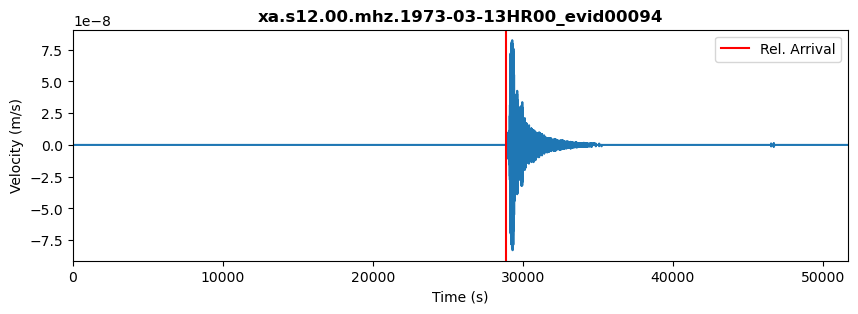

In [10]:
csv_times = np.array(data_catalog["time_rel(sec)"].tolist())
csv_velocity = np.array(data_catalog["velocity(m/s)"].tolist())

# Plot the trace!
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_velocity)
# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')
# Plot where the arrival time is
arrival_line = ax.axvline(x=arrival_time_relative, c='red', label='Rel. Arrival')
ax.legend(handles=[arrival_line])

Function

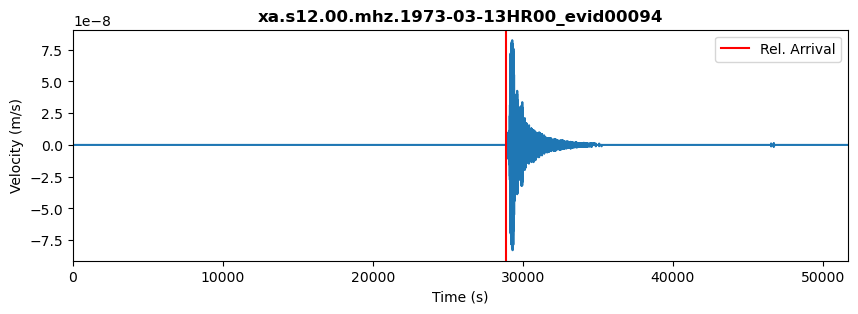

In [11]:

catalog_lunar_dir = "../data/lunar/data/training/catalogs/apollo12_catalog_GradeA_final.csv"
data_dir = "../data/lunar/data/training/data/Processed/"
row_num = row_num

def plot_catalogued_data(catalog_dir, data_dir, row_num):
    catalog_lunar = pd.read_csv(catalog_lunar_dir)
    row = catalog_lunar.iloc[row_num]
    arrival_time_relative = row["time_rel(sec)"]
    test_filename = row.filename
    csv_file = f'{data_dir}{test_filename}.csv'
    data_catalog = pd.read_csv(csv_file)

    csv_times = np.array(data_catalog["time_rel(sec)"].tolist())
    csv_velocity = np.array(data_catalog["velocity(m/s)"].tolist())

    # Plot the trace!
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    ax.plot(csv_times,csv_velocity)
    # Make the plot pretty
    ax.set_xlim([min(csv_times),max(csv_times)])
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')
    ax.set_title(f'{test_filename}', fontweight='bold')
    # Plot where the arrival time is
    arrival_line = ax.axvline(x=arrival_time_relative, c='red', label='Rel. Arrival')
    ax.legend(handles=[arrival_line])

    


plot_catalogued_data(catalog_lunar_dir, data_dir, row_num)


In [12]:
test_filename = row.filename
test_filename

'xa.s12.00.mhz.1973-03-13HR00_evid00094'

Function to Plot according to chunk

In [13]:
def plot_chunk(chunk):
    csv_times = np.array(chunk["time_rel(sec)"].tolist())
    csv_velocities = np.array(chunk["velocity(m/s)"].tolist())

    # Plot the trace!
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    ax.plot(csv_times,csv_velocities)
    # Make the plot pretty
    ax.set_xlim([min(csv_times),max(csv_times)])
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')
    
    